In [31]:
##Import Statements
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.seasonal import STL
from sklearn.metrics import mean_squared_error, r2_score
#Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso




import plotly.express as px



In [4]:
#Function to add ticker
def tickAdder(ticker):
    tick = yf.Ticker(ticker)
    tick = tick.history(start="1999-08-15", end="2024-06-07")
    return tick

In [5]:
#Function to plot Corr Matrix
def corrMatrix(dataframe):
    correlation_matrix = dataframe.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.show()

In [6]:
def timePlot(y, colName, ticker_symbol, start, end):
    y.plot()
    plt.xlim(start, end)
    plt.xlabel('Date')
    plt.ylabel( colName + ' Price')
    plt.title('Price of {}'.format(ticker_symbol))
    plt.grid(True)
    plt.show()
    

In [22]:
def linReg(X_train, y_train, X_test, y_test):
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    y_pred = lin_reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return r2, mse, y_pred, lin_reg

In [8]:
def rigReg(X_train, y_train, X_test, y_test):
    ridge_reg = Ridge(alpha=1.0, solver='svd',random_state=42)
    ridge_reg.fit(X_train, y_train)
    y_pred = ridge_reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return r2, mse, y_pred, ridge_reg

In [42]:
def lassoReg(X_train, y_train, X_test, y_test):
    lasso_reg = Lasso(alpha=0.5,max_iter=10000)
    lasso_reg.fit(X_train, y_train)
    y_pred = lasso_reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return r2, mse, y_pred, lasso_reg

In [10]:
##Import Apple Data
data = yf.Ticker("aapl")
data = data.history(start="1999-08-15", end="2024-06-07")

In [11]:
#Naive Seasonal Decomposition 
#Identify Trend, seasonal, and residual components of close
result = seasonal_decompose(data['Close'], model='multiplicative', period=1)

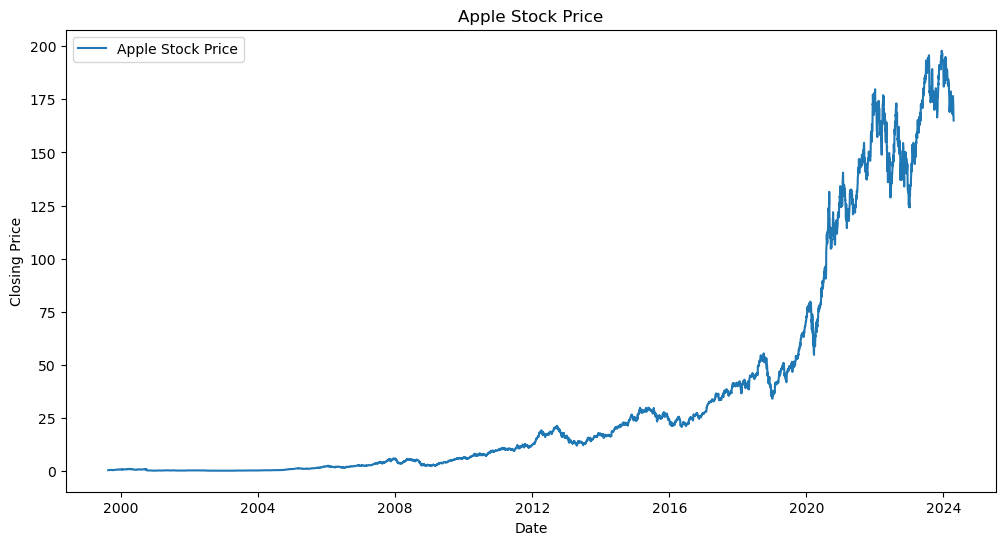

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label="Apple Stock Price")
plt.title("Apple Stock Price")
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

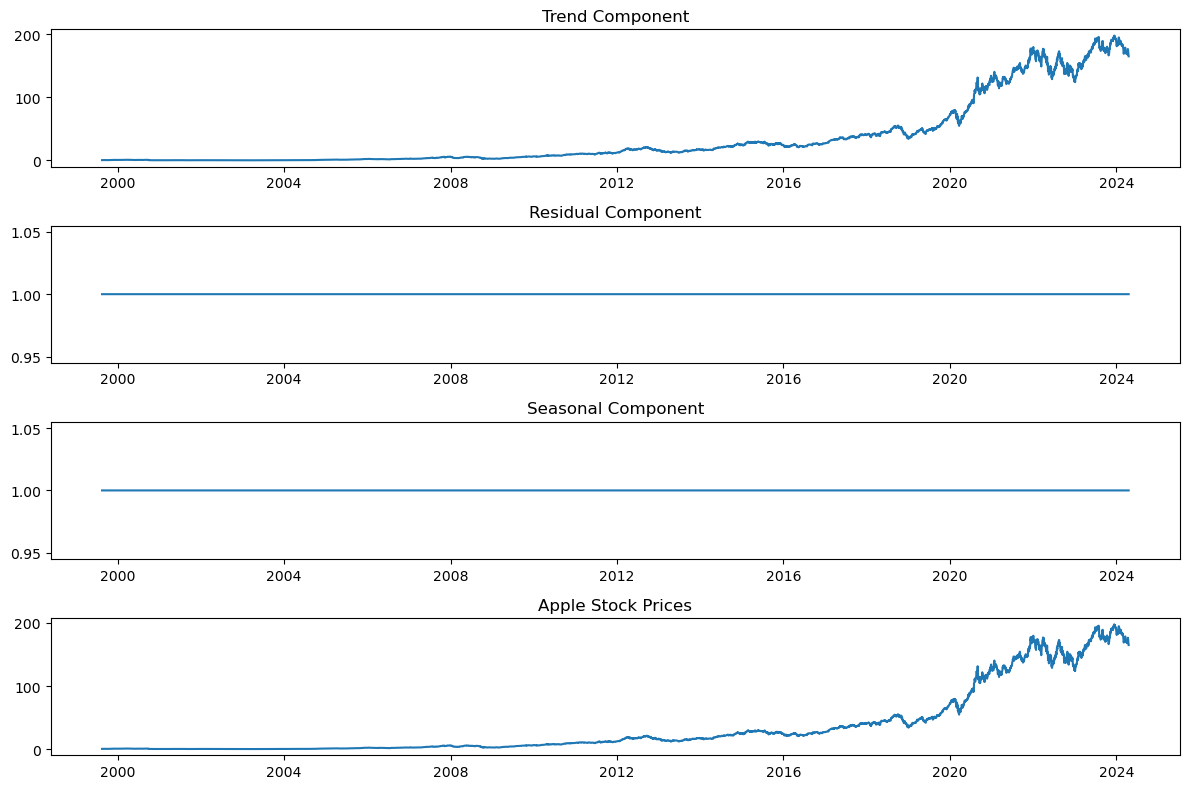

In [13]:
# Simple Seasonal Decomposition Model
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(result.trend, label='Trend')
plt.title('Trend Component')
# (Similar blocks for Seasonal and Residual components)

plt.subplot(4, 1, 2)
plt.plot(result.resid, label='Residual')
plt.title('Residual Component')
# (Similar blocks for Seasonal and Residual components)

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.title('Seasonal Component')
# (Similar blocks for Seasonal and Residual components)

plt.subplot(4, 1, 4)

# SHOULD TREND AND SEASONALITY OCCUR W.R.T to the Y-VARIABLE
plt.plot(data['Close'], label= "Apple Stock Price")
plt.title("Apple Stock Prices")
plt.tight_layout()
plt.show()

(6210,)

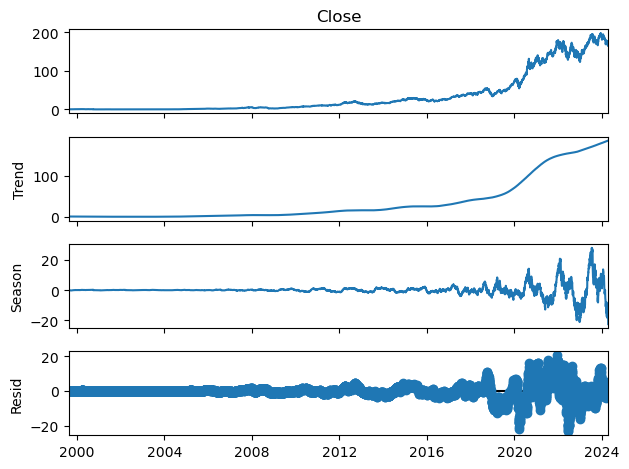

In [14]:
#Complex Seasonal Decomposition Model 
from statsmodels.tsa.seasonal import STL
stl = STL(data["Close"], period = 365)
res = stl.fit()
fig = res.plot()
res.resid.shape

In [15]:
#Adding Trend and Seasonality to our model 
data["Trend"] = res.trend
data["Seasonality"] = res.seasonal

In [16]:
##Feature Implementation 

#Rolling averages
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_100'] = data['Close'].rolling(window=100).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

#Volatility indicator
data['std_20'] = data['Close'].rolling(window=20).std()

# Calculate Technical Indicators (RSI)
delta = data['Close'].diff(1)
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
data['RSI'] = 100 - (100 / (1 + rs))

# Calculate lagged values
data['Close_lag1'] = data['Close'].shift(1)
data['Close_lag5'] = data['Close'].shift(5)

In [17]:
#Ensure that there exist no null values
data = data[202:]
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Trend,Seasonality,SMA_50,SMA_100,SMA_200,std_20,RSI,Close_lag1,Close_lag5
Date,,,,,,,,,,,,,,,,
2000-06-02 00:00:00-04:00,0.708650,0.754003,0.672744,0.699673,792848000,0.0,0.0,0.639389,0.050898,0.860917,0.860458,0.744279,0.069253,34.207022,0.673689,0.659634
2000-06-05 00:00:00-04:00,0.705342,0.719987,0.677941,0.690224,323668800,0.0,0.0,0.638271,0.050024,0.853358,0.860350,0.745509,0.063123,38.552374,0.699673,0.652902
2000-06-06 00:00:00-04:00,0.695185,0.731326,0.682666,0.702035,525481600,0.0,0.0,0.637154,0.049603,0.846432,0.860780,0.746783,0.057585,33.652475,0.690224,0.661878
2000-06-07 00:00:00-04:00,0.707705,0.733215,0.692586,0.729908,337019200,0.0,0.0,0.636038,0.065645,0.839931,0.860765,0.748136,0.054443,43.760105,0.702035,0.634950
2000-06-08 00:00:00-04:00,0.737940,0.744554,0.703925,0.716680,238526400,0.0,0.0,0.634921,0.060401,0.833232,0.860340,0.749438,0.053693,42.519632,0.729908,0.673689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-15 00:00:00-04:00,175.360001,176.630005,172.500000,172.690002,73531800,0.0,0.0,184.699324,-10.965557,176.769627,183.644459,182.356559,3.019809,53.230333,176.550003,168.449997
2024-04-16 00:00:00-04:00,171.750000,173.759995,168.270004,169.380005,73711200,0.0,0.0,184.782864,-13.765326,176.444964,183.426199,182.259238,3.025099,49.461661,172.690002,169.669998
2024-04-17 00:00:00-04:00,169.610001,170.649994,168.000000,168.000000,50901200,0.0,0.0,184.866436,-16.007533,176.056148,183.202228,182.133202,2.920601,40.661275,169.380005,167.779999


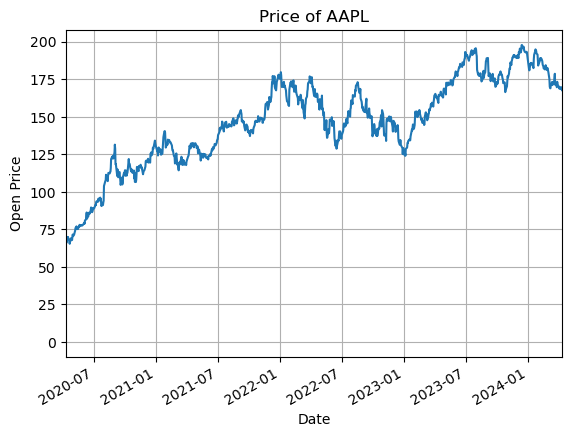

In [19]:
#Common Data Cleaning 

timePlot(data["Close"], "Open", "AAPL", "2020-04-10", "2024-04-10")

In [20]:
#Training and test split
target = "Close"
y = data[target]
X = data.drop(columns= target)                                             
#Split the data into train and test sets
cutoff = int(len(X) * 0.7)
X_train, y_train = X.iloc[:cutoff], y.iloc[:cutoff]
X_test, y_test = X.iloc[cutoff:], y.iloc[cutoff:]

In [23]:
#Linear Regression Iteration 1 
r2, mse, y_pred, model = linReg(X_train, y_train, X_test, y_test)

In [24]:
r2, mse

(0.9998219765369176, 0.5377562424713669)

In [25]:
#Ridge Regression Iteration 1
r2, mse, y_pred, model = rigReg(X_train, y_train, X_test, y_test)

In [26]:
r2, mse

(0.999820668847264, 0.5417063862464052)

In [43]:
#ElasticNet Iteration 1
r2, mse, y_pred, model = lassoReg(X_train, y_train, X_test, y_test)

In [44]:
r2, mse

(0.999413988452315, 1.7701676086489972)

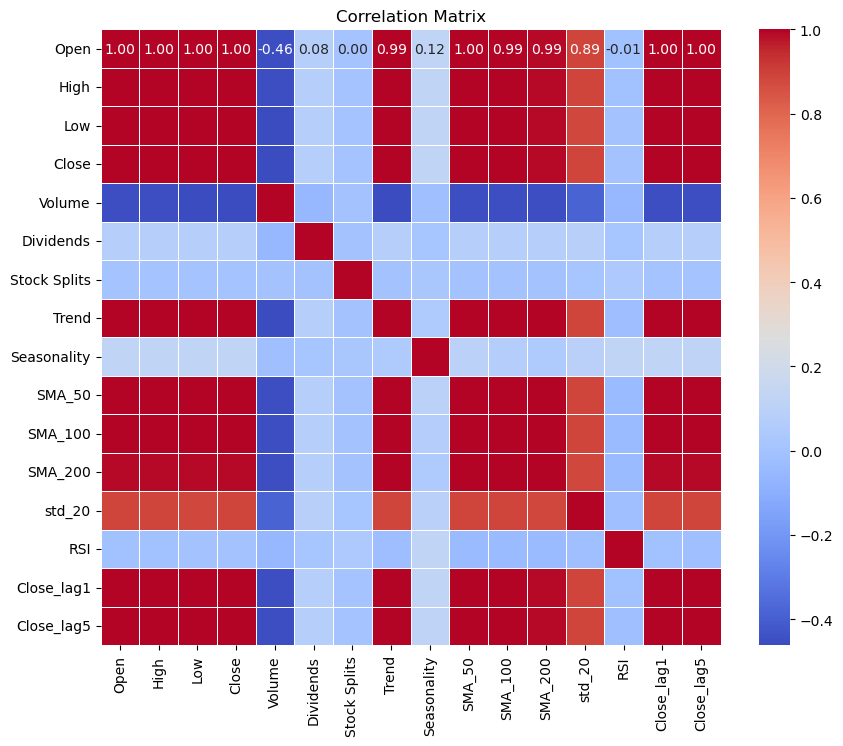

In [30]:

corrMatrix(data)

In [54]:
#Add msft ticker
msft = tickAdder("msft")
nvda = tickAdder("nvda")

In [55]:
data["Close Nvidia"] = nvda["Close"]

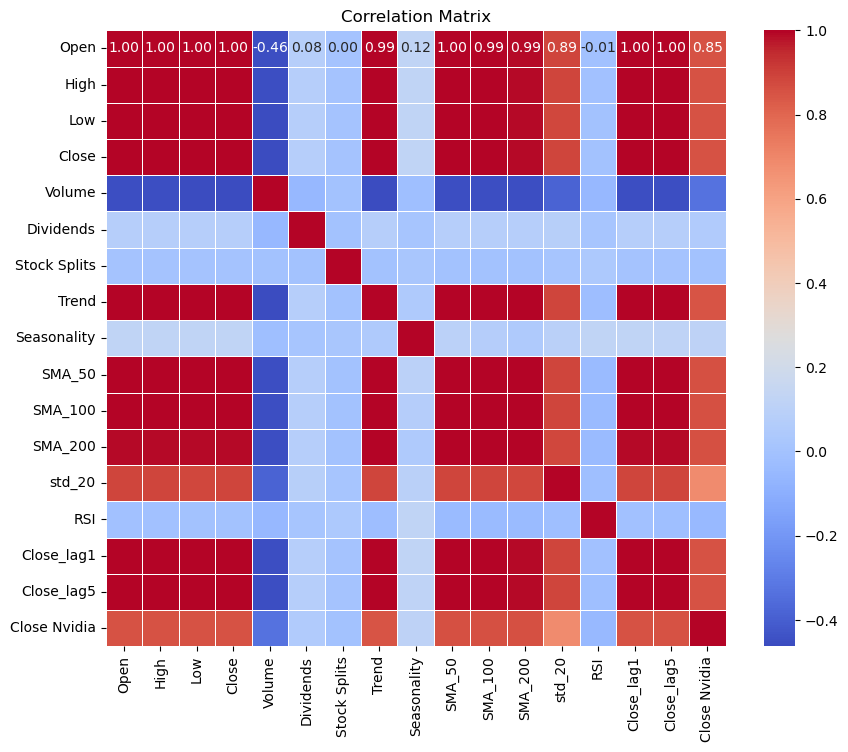

In [56]:
corrMatrix(data)